<a href="https://colab.research.google.com/github/06081992/Machine-Learning-first-steps/blob/main/Regresion_Linea1l.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# En primer lugar importamos las librerías de trabajo básicas en cualquier
# proyecto de aprendizaje automático
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Y cargamos los datos contenidos en nuestro dataset
df = pd.read_csv("insurance.csv")
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


# Exploración de datos
Como hemos visto en el tema 2.3.3 uno de los primeros pasos que debemos realizar es explorar los datos y XXX

<ipython-input-3-51b672808142>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color='red')


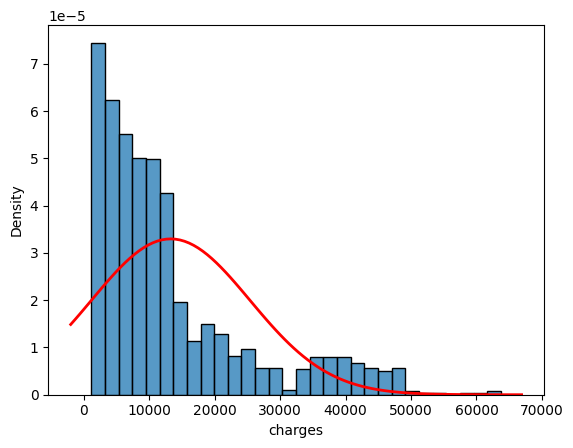

In [3]:
# Observamos cómo se distribuye la variable objetivo "charges" que
# recoge los cargos realizados al seguro
sns.histplot(df['charges'], stat="density")
# Ajustamos los datos a la dristribución normal
from scipy.stats import norm
mu, std = norm.fit(df['charges'])
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, color='red')
plt.show()

De la figura anterior podemos concluir que la variable objetivo "charges" no sigue una distribución normal, sino más bien una distribución mixta, lo que podría ser un problema para obtener un rendimiento óptimo para nuestro modelo lineal

<ipython-input-4-f8d69c155341>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='viridis')


<Axes: >

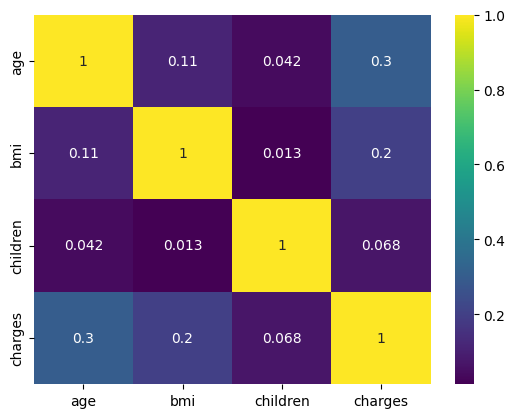

In [4]:
# Revisamos la matriz de correlación para ver posibles dependencias
sns.heatmap(df.corr(), annot=True, cmap='viridis')

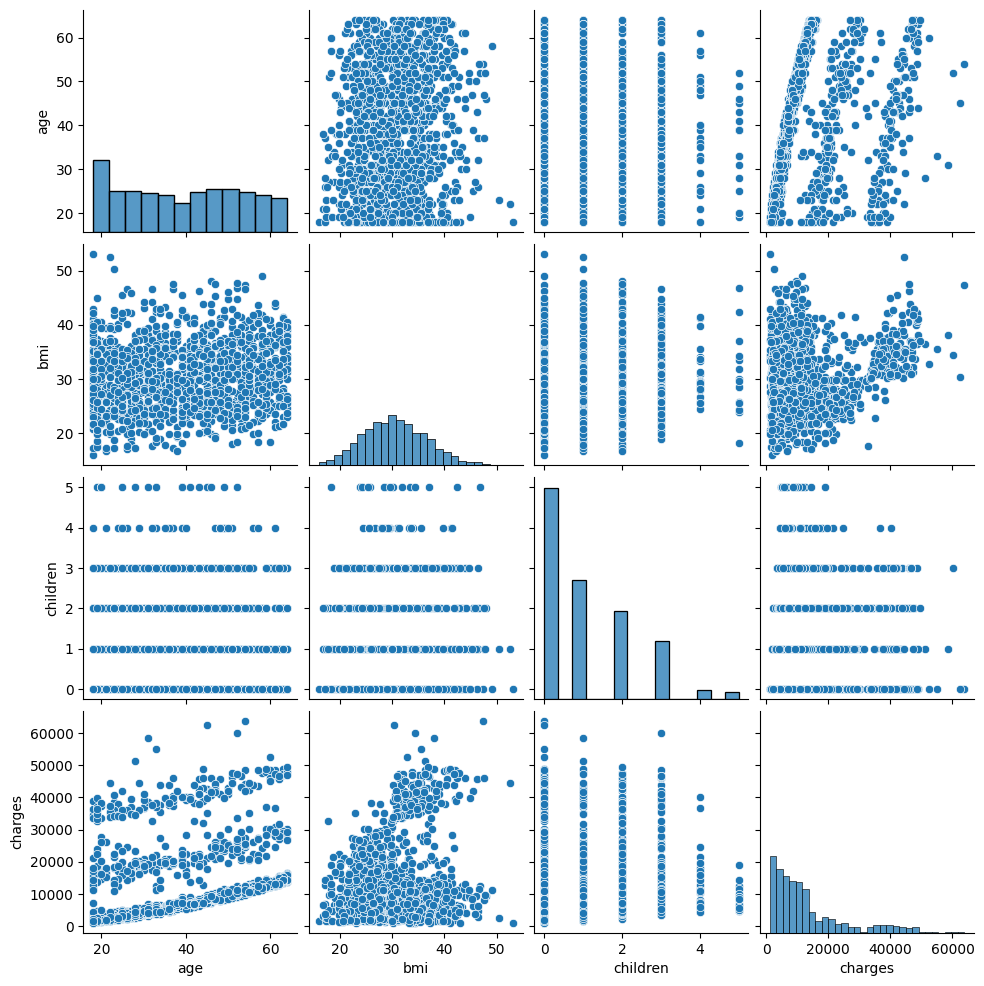

In [5]:
# Creamos un pair plot para visualizar las morfologñia de las correlaciones
sns.pairplot(df)

El siguiente paso consiste en codificar las variables categóricas

In [6]:
# Para ello, recurriremos al método get_dummies de Pandas
# que aplicamos sobre cada variable categórica
vars = ['sex', 'smoker', 'region']
dummies = [pd.get_dummies(df[var]) for var in vars]

# Aprovechamos para renombrar las variables y combinamos con el resto de columnad
df_d = pd.concat(dummies, axis=1)
df_d.rename(columns={'female': 'mujer', 'male': 'hombre', 'no': 'no_fumador', 'yes': 'fumador', 'northwest': 'region_a',
                     'northeast': 'region_b','southwest': 'region_c', 'southeast': 'region_d'}, inplace=True)
df_r = df.drop(['sex','smoker','region'], axis=1)
df_c = pd.concat([df_r, df_d], axis=1)
# Vemos que nuestro nuevo dataset está correctamente configurados
print("Varibles categóricas codificadas:\n", df_c[['mujer', 'hombre', 'fumador', 'no_fumador', 'region_a', 'region_b', 'region_c', 'region_d']])

Varibles categóricas codificadas:
       mujer  hombre  fumador  no_fumador  region_a  region_b  region_c  \
0         1       0        1           0         0         0         1   
1         0       1        0           1         0         0         0   
2         0       1        0           1         0         0         0   
3         0       1        0           1         1         0         0   
4         0       1        0           1         1         0         0   
...     ...     ...      ...         ...       ...       ...       ...   
1333      0       1        0           1         1         0         0   
1334      1       0        0           1         0         1         0   
1335      1       0        0           1         0         0         0   
1336      1       0        0           1         0         0         1   
1337      1       0        1           0         1         0         0   

      region_d  
0            0  
1            1  
2            1  
3       

Valores rescalados:
         age       bmi   charges
0 -1.438764 -0.453320  0.298584
1 -1.509965  0.509621 -0.953689
2 -0.797954  0.383307 -0.728675
3 -0.441948 -1.305531  0.719843
4 -0.513149 -0.292556 -0.776802


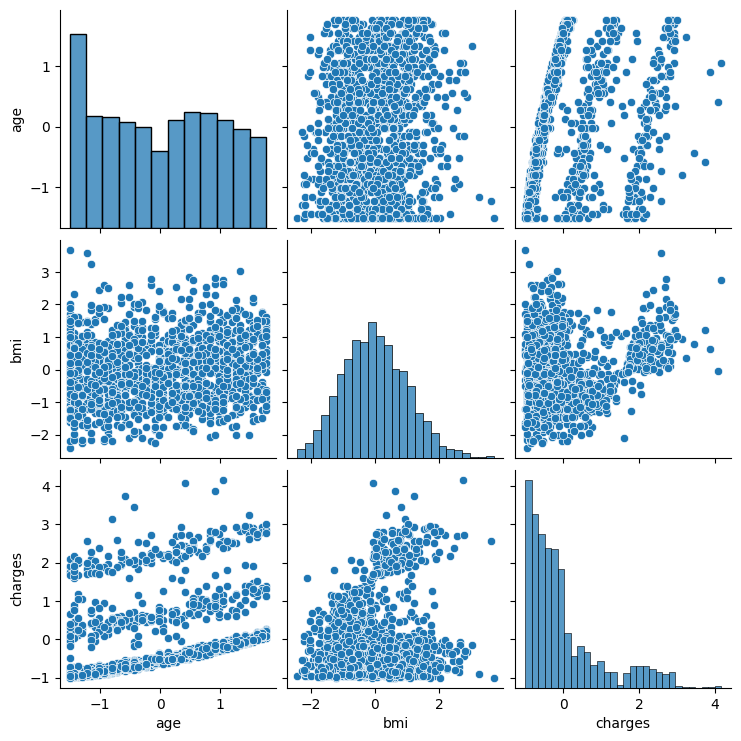

In [7]:
# La siguiente fase del pre-procesado consiste en re-escalar los datos
# En este caso aplicaremos métodos de la clase StandardScaler de Sci-kit learn
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(df_c)
df_s = pd.DataFrame(scaler.fit_transform(df_c), columns=df_c.columns)
print("Valores rescalados:\n", df_s[['age', 'bmi', 'charges']].iloc[0:5])
sns.pairplot(df_s[['age', 'bmi', 'charges']])

# Extracción de características

Text(0, 0.5, 'Porcentaje de varianza explicado')

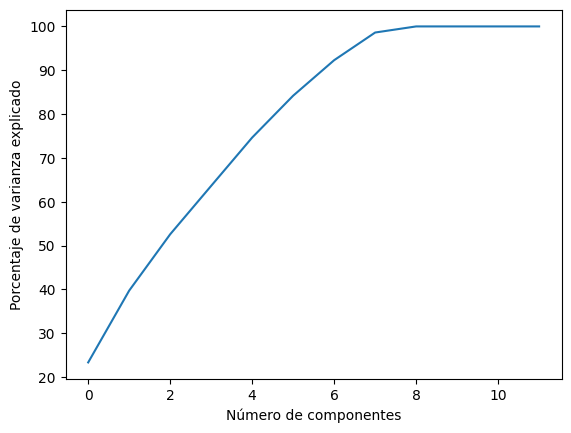

In [9]:
# Aplicaremos la técnica PCA para indenditicar las variables más representativas
from sklearn.decomposition import PCA
# Los nombres de las características se indentifican en las cabeceras de las columnas
features = df_s.columns
X = df_s[features]

# Analizamos el conjunto completo de variables
pca = PCA(n_components=len(features), random_state=2020)
pca.fit(X)
X_pca = pca.transform(X)

# Representamos en un gráfico el porcentaje de varianza frente al número de componentes
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Número de componentes")
plt.ylabel("Porcentaje de varianza explicado")


In [11]:
# Nos quedamos con las 6 variables que explican más del 90% de la varianza
pca_s = PCA(n_components=6, random_state=2020)
pca_s.fit(X)
#Obtenemos el conjunto transformado que incorpora las variables más explicativas
X_pca_s = pca_s.transform(X)
cols = ['PCA'+ str(i) for i in range(6)]
df_pca = pd.DataFrame(X_pca_s, columns=cols)
print("Datos para las 6 componenetes principales:\n", df_pca)

Datos para las 6 componenetes principales:
           PCA0      PCA1      PCA2      PCA3      PCA4      PCA5
0     1.794247  1.834668 -0.797065  1.761831 -0.520355 -2.435473
1    -0.622380 -1.748394  1.626639 -0.870391  0.064339 -1.527498
2    -0.414757 -1.690923  1.615243 -0.585496  0.216697 -0.392165
3    -0.195383 -1.336715 -1.440494 -0.418641  1.708185 -0.347876
4    -0.904619 -1.576005 -0.928444 -0.467650  1.681639 -0.477592
...        ...       ...       ...       ...       ...       ...
1333 -0.410680 -1.469268 -0.644184  0.008130  1.909517  1.570023
1334 -1.505168  1.096178 -0.701978 -1.298499 -1.526170 -1.011097
1335 -1.213596  0.991307  2.075771 -0.955261 -0.022759 -1.765757
1336 -1.682817  1.076329 -0.381511  1.619760 -0.594675 -1.842200
1337  2.555342  2.187712 -1.094759 -0.066644  1.767942  0.687237

[1338 rows x 6 columns]


# Ajuste del modelo lineal
Completado el proceso de preparación de datos realizaremos el ajuste del modelo

In [12]:
from sklearn.model_selection import train_test_split
# Las características que vamos a analizar son las seleccionados con PCA
pca_features = df_pca.columns
X = df_pca[pca_features]
Y = df_s['charges']

#Usaremos la funcion propia de sklearn para dividr los datos para entrenamiento de prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("Y_train:", Y_train.shape)
print("Y_test:",Y_test.shape)

X_train: (802, 6)
X_test: (536, 6)
Y_train: (802,)
Y_test: (536,)


In [14]:
# Exponemos el conjunto de entrenamiento al modelo de regresión lineal
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [16]:
# Para obtener descriptores del ajuste utilizamos funciones de Sci-kit learn y
# calculamos las predicciones del modelo sobre el conjunto de prueba

from sklearn import metrics
Y_pred = lm.predict(X_test)

evar = metrics.explained_variance_score(Y_test, Y_pred)
r2 = metrics.r2_score(Y_test, Y_pred)
mae = metrics.mean_absolute_error(Y_test, Y_pred)
mse = metrics.mean_squared_error(Y_test, Y_pred)

print('- Varianza explicada: ', round(evar, 2))
print("- R2:", round(r2, 2))
print('- MAE: ', round(mae, 4))
print('- MSE: ', round(mse,4))
print('- RMSE: ', round(np.sqrt(mse), 4))


- Varianza explicada:  0.87
- R2: 0.87
- MAE:  0.2329
- MSE:  0.1157
- RMSE:  0.3402


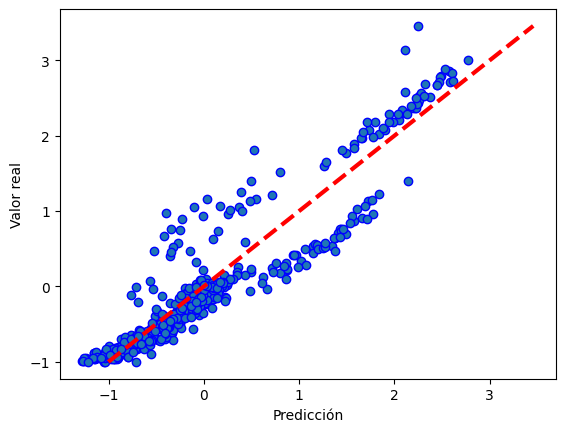

In [17]:
# Finalmente representamos la recta de regresión del modelo
fig, ax= plt.subplots()
ax.scatter(Y_pred, Y_test, edgecolors=(0, 0, 1))
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicción')
ax.set_ylabel('Valor real')
plt.show()
